# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
try:
    df_porter = pd.read_csv("porter_data_1.csv")
except FileNotFoundError:
    print("File not found. Please check the file path and name.")
    exit()

In [4]:
df_porter.head(3)  # Display the first few rows of the DataFrame to understand its structure

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56


In [5]:
print(df_porter.info())  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [6]:
print(df_porter.describe())  # Display summary statistics for numerical columns in the DataFrame

           market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924    

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [7]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df_porter['created_at'] = pd.to_datetime(df_porter['created_at'])
df_porter['actual_delivery_time'] = pd.to_datetime(df_porter['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [8]:
# Convert categorical features to category type

df_porter['store_primary_category'] = df_porter['store_primary_category'].astype('category')
df_porter['order_protocol'] = df_porter['order_protocol'].astype('category')
df_porter['market_id'] = df_porter['market_id'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [9]:
# Calculate time taken in minutes
df_porter['time_taken'] = (df_porter['actual_delivery_time'] - df_porter['created_at']).dt.total_seconds() / 60.0
# hour and day from created_at column
df_porter['hour'] = df_porter['created_at'].dt.hour
df_porter['day'] = df_porter['created_at'].dt.day_name()

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [10]:
# Extract the hour and day of week from the 'created_at' timestamp
df_porter['hour'] = df_porter['created_at'].dt.hour  # Extract hour from 'created_at'
df_porter['day_of_week'] = df_porter['created_at'].dt.day_name()  # Extract day of the week from 'created_at'

# Create a categorical feature 'isWeekend'
df_porter['isWeekend'] = df_porter['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [11]:
df_porter.head(3)  # Display the first few rows of the DataFrame to understand its structure

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,hour,day,day_of_week,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,Friday,Friday,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,Tuesday,Tuesday,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,Monday,Monday,0


In [12]:
# Drop unnecessary columns

df_porter.drop(columns=['created_at', 'actual_delivery_time','day'], inplace=True)

In [13]:
df_porter.head(3)  # Display the first few rows of the DataFrame to understand its structure

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,hour,day_of_week,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,Friday,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,Tuesday,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,Monday,0


In [ ]:

# write to a new csv file
df_porter.to_csv("porter_data_cleaned.csv", index=False)  # Save the cleaned DataFrame to a new CSV file

In [15]:
df_porter.shape

(175777, 16)

In [16]:
try:
    df_porter_cleaned = pd.read_csv("porter_data_cleaned.csv")  # Read the cleaned DataFrame from the CSV file
except FileNotFoundError:
    print("File not found. Please check the file path and name.")
    exit()

df_porter_cleaned.head() 
df_porter.shape

(175777, 16)

In [17]:
# Convert 'day_of_week' values to numerical values
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df_porter_cleaned['day_of_week'] = df_porter_cleaned['day_of_week'].map(day_mapping)  # Map day names to numbers


In [18]:
# find top 20 values from store_primary_category column and arrange them in descending order.


top_20_categories = df_porter_cleaned['store_primary_category'].value_counts().nlargest(20).index  # Get the top 20 categories

df_porter_cleaned.head()  # Display the first few rows of the DataFrame to understand its structure

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,hour,day_of_week,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [19]:
# Create dummies for categorical variables like 'store_primary_category' and 'order_protocol' and 'marketplace_id'.

# Use the top 20 categories for dummies and group others into 'Other'

df_porter_cleaned['store_primary_category'] = df_porter_cleaned['store_primary_category'].where(
    df_porter_cleaned['store_primary_category'].isin(top_20_categories), 'Other')  # Group other categories into 'Other'


df_dummies = pd.get_dummies(
    df_porter_cleaned,
    columns=['market_id', 'order_protocol', 'store_primary_category'],
    drop_first=True, dtype=int)
 
df_dummies.to_csv('porter_data_final_LR.csv', index=False)
df_dummies.shape 

(175777, 44)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

In [20]:
try:
    df_porter_LR = pd.read_csv("porter_data_final_LR.csv")  # Read the cleaned DataFrame from the CSV file
except FileNotFoundError:
    print("File not found. Please check the file path and name.")
    exit()
df_porter_LR.shape

(175777, 44)

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [21]:
# Define target variable (y) and features (X)
y = df_porter_LR['time_taken']  # Target variable
X = df_porter_LR.drop(columns=['time_taken'])  # Features

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [22]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 
    'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 
    'total_outstanding_orders', 'distance', 'hour', 'time_taken'
]

categorical_cols = [
    'isWeekend', 'day_of_week'
] 
print("Numeric columns:", len(numerical_cols))
print(numerical_cols)
print("Categorical columns:", len(categorical_cols))
print(categorical_cols)

# Note dummies are already created for categorical variables like 'store_primary_category', 'order_protocol', and 'marketplace_id'. They are not included in the categorical_cols list as they are already one-hot encoded.

Numeric columns: 11
['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'time_taken']
Categorical columns: 2
['isWeekend', 'day_of_week']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

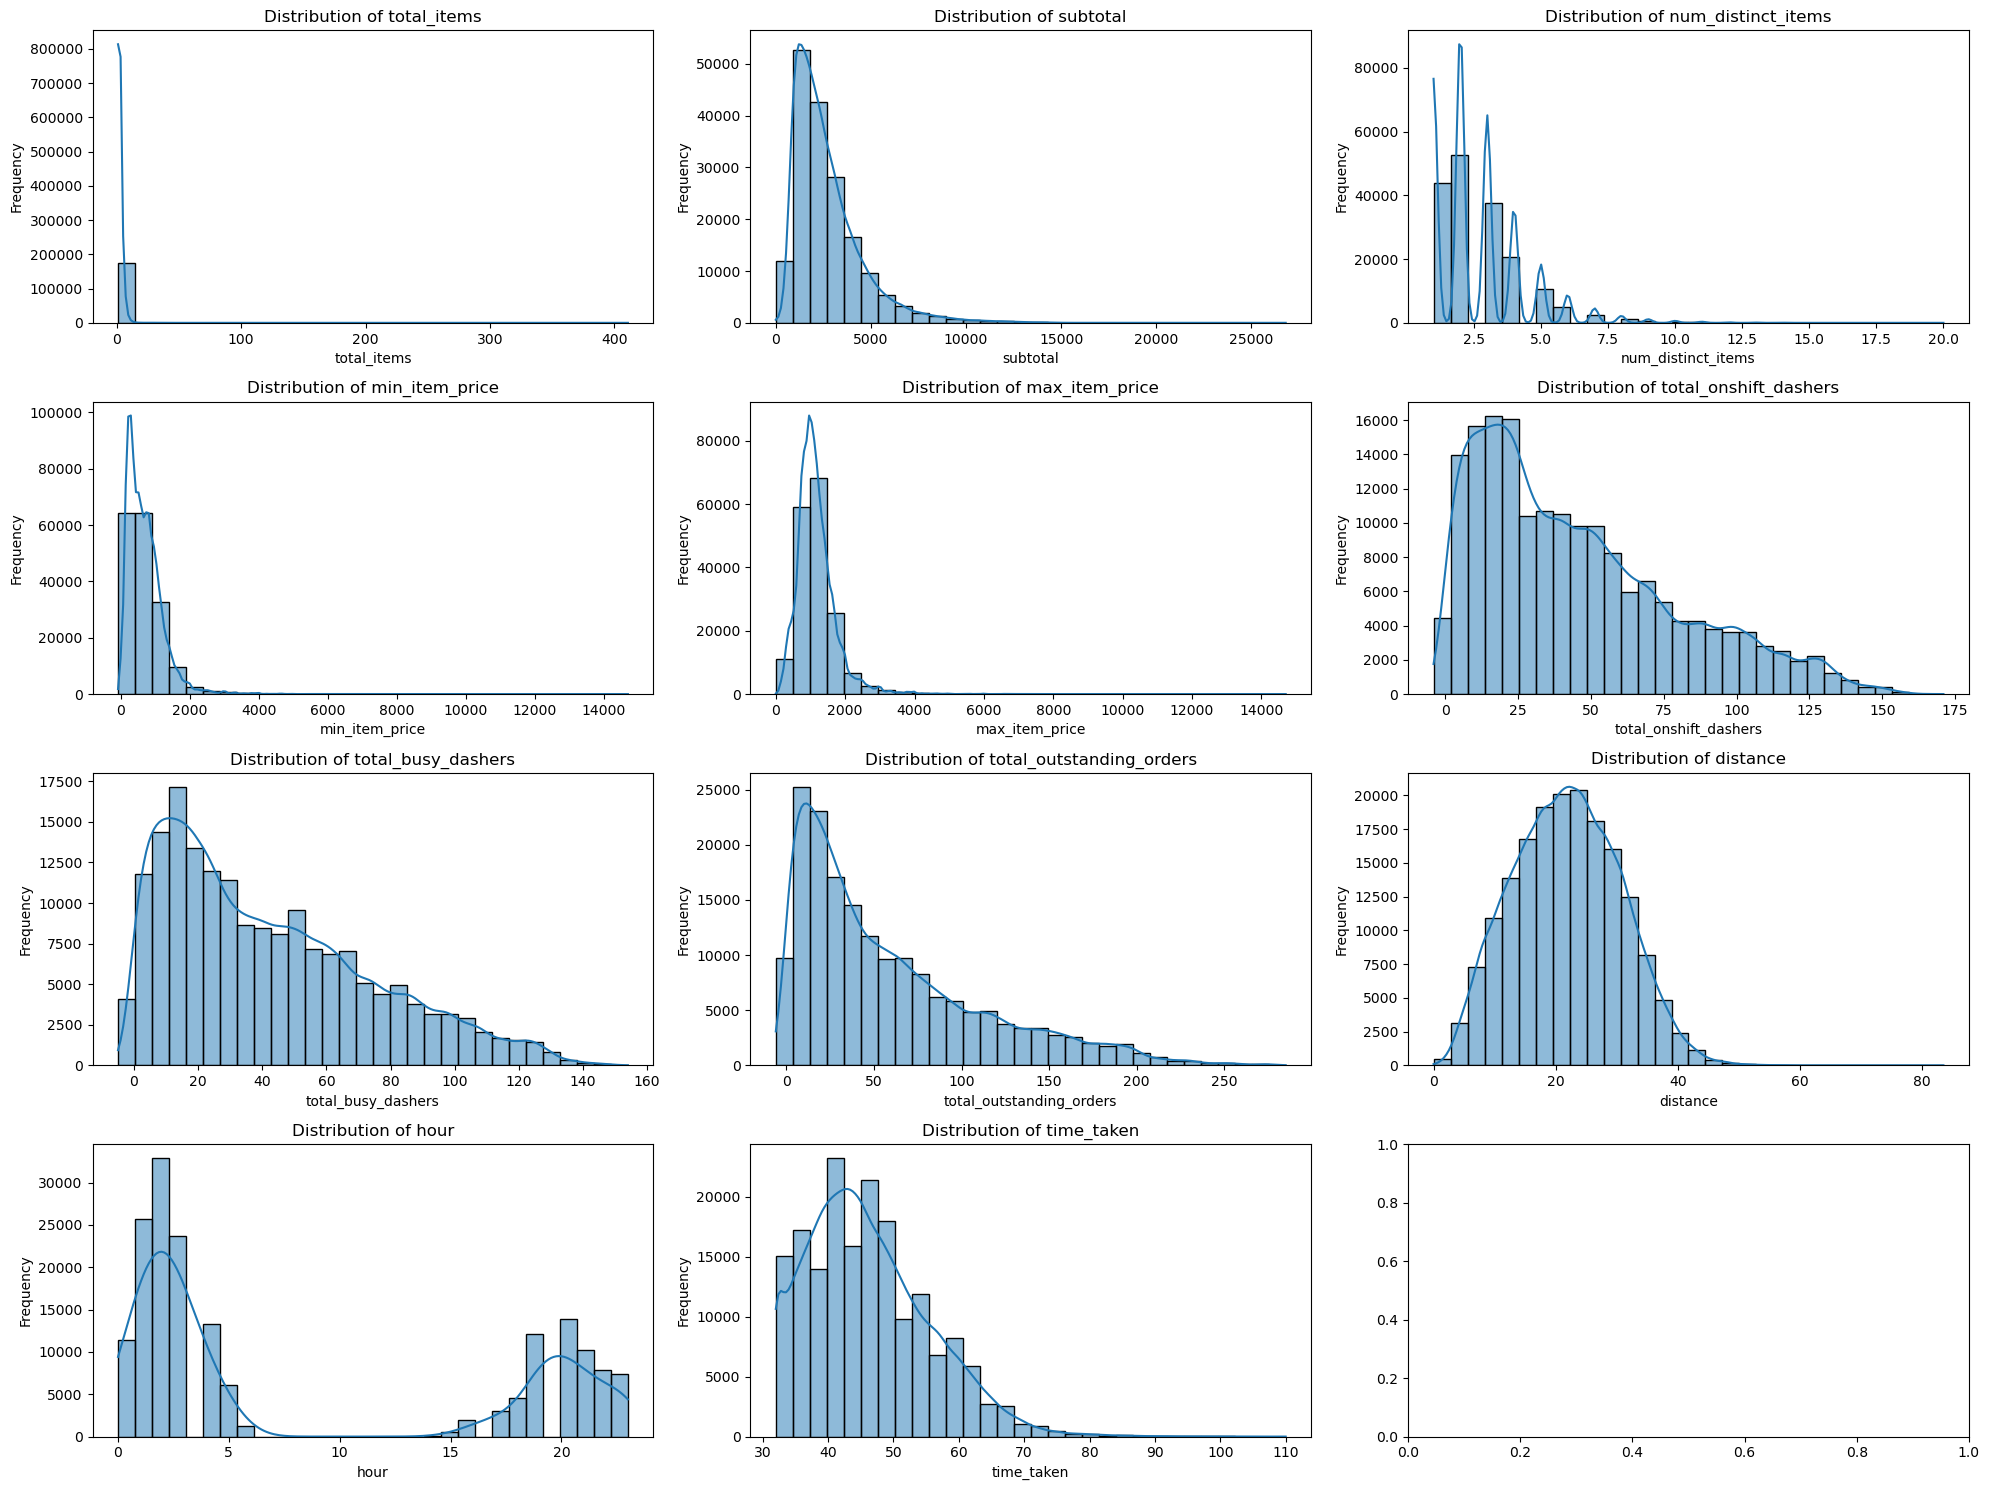

In [24]:
# Plot distributions for all numerical columns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))  # Create subplots for numerical columns
axes = axes.flatten()  # Flatten the axes array for easy indexing
for i, col in enumerate(numerical_cols):
    sns.histplot(df_porter_LR[col], bins=30, kde=True, ax=axes[i])  # Plot histogram with KDE for each numerical column
    axes[i].set_title(f'Distribution of {col}')  # Set title for each subplot
    axes[i].set_xlabel(col)  # Set x-label for each subplot
    axes[i].set_ylabel('Frequency')  # Set y-label for each subplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

In [ ]:
''' 
Order-Related Features
total_items and num_distinct_items: Both show right-skewed distributions with a high frequency of smaller orders (1-5 items) and a long tail of larger orders. 
This skewness indicates most deliveries involve relatively few items, with occasional large orders that could affect delivery times disproportionately.
subtotal: Heavily right-skewed with most orders clustered in the lower price range ($10-30) and a long tail extending to much higher values. The strong positive correlation this variable shows with delivery time suggests larger orders take substantially more time.
min_item_price and max_item_price: Both display multi-modal distributions, suggesting distinct price tiers in menu items across restaurants.
Operational Features
total_onshift_dashers and total_busy_dashers: Both exhibits relatively normal distributions with some positive skew, indicating the system generally maintains consistent staffing levels with occasional peaks.
total_outstanding_orders: Right-skewed distribution showing the system typically operates with a manageable backlog, but experiences periodic high-demand situations.
distance: Right-skewed, showing most deliveries happen within a short range (likely 1-5 km/miles), with fewer long-distance deliveries.
Temporal Features
hour: Shows a non-uniform distribution with peaks around meal times (likely lunch and dinner), reflecting natural demand patterns throughout the day.
time_taken: The target variable displays a right-skewed distribution, with most deliveries completed relatively quickly but a long tail of deliveries taking significantly longer. This suggests potential challenges in predicting outlier cases.

'''

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

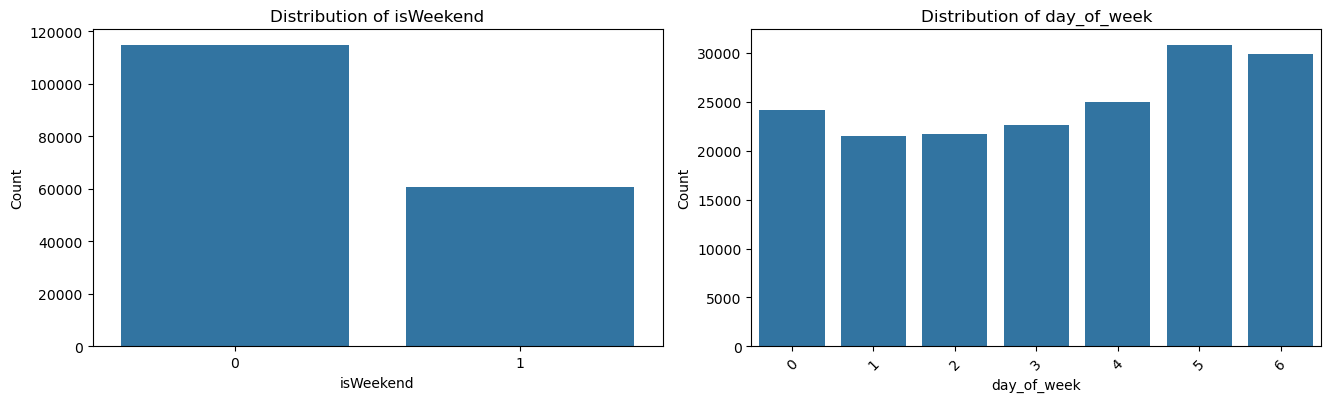

In [33]:
# Distribution of categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.countplot(data=X, x=col)  # Plot count of each category
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

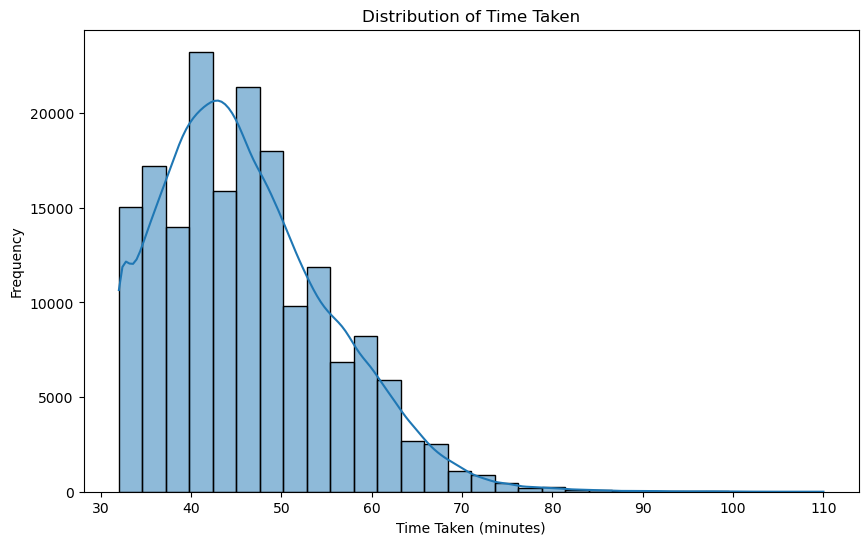

In [34]:
# Distribution of time_taken
# Visualise the distribution of the target variable = time_taken to understand its spread and any skewness

plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(y, bins=30, kde=True)  # Plot histogram with KDE for the target variable
plt.title('Distribution of Time Taken')  # Set title for the plot
plt.xlabel('Time Taken (minutes)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.show()  # Show the plot


In [ ]:
'''
Distribution Characteristics
Right-Skewed Pattern: The distribution shows a pronounced positive (right) skew, with a concentration of values on the left side and a long tail extending to the right 
Concentration of Shorter Deliveries: Most deliveries are completed within a narrower time frame toward the lower end of the range
Long Tail of Extended Deliveries: A small but significant number of deliveries take considerably longer than the typical delivery time
Non-Normal Distribution: The distribution clearly deviates from normality, which has statistical implications
Outlier Considerations: The long tail indicates potential outliers that might need special handling in the modeling process

'''

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

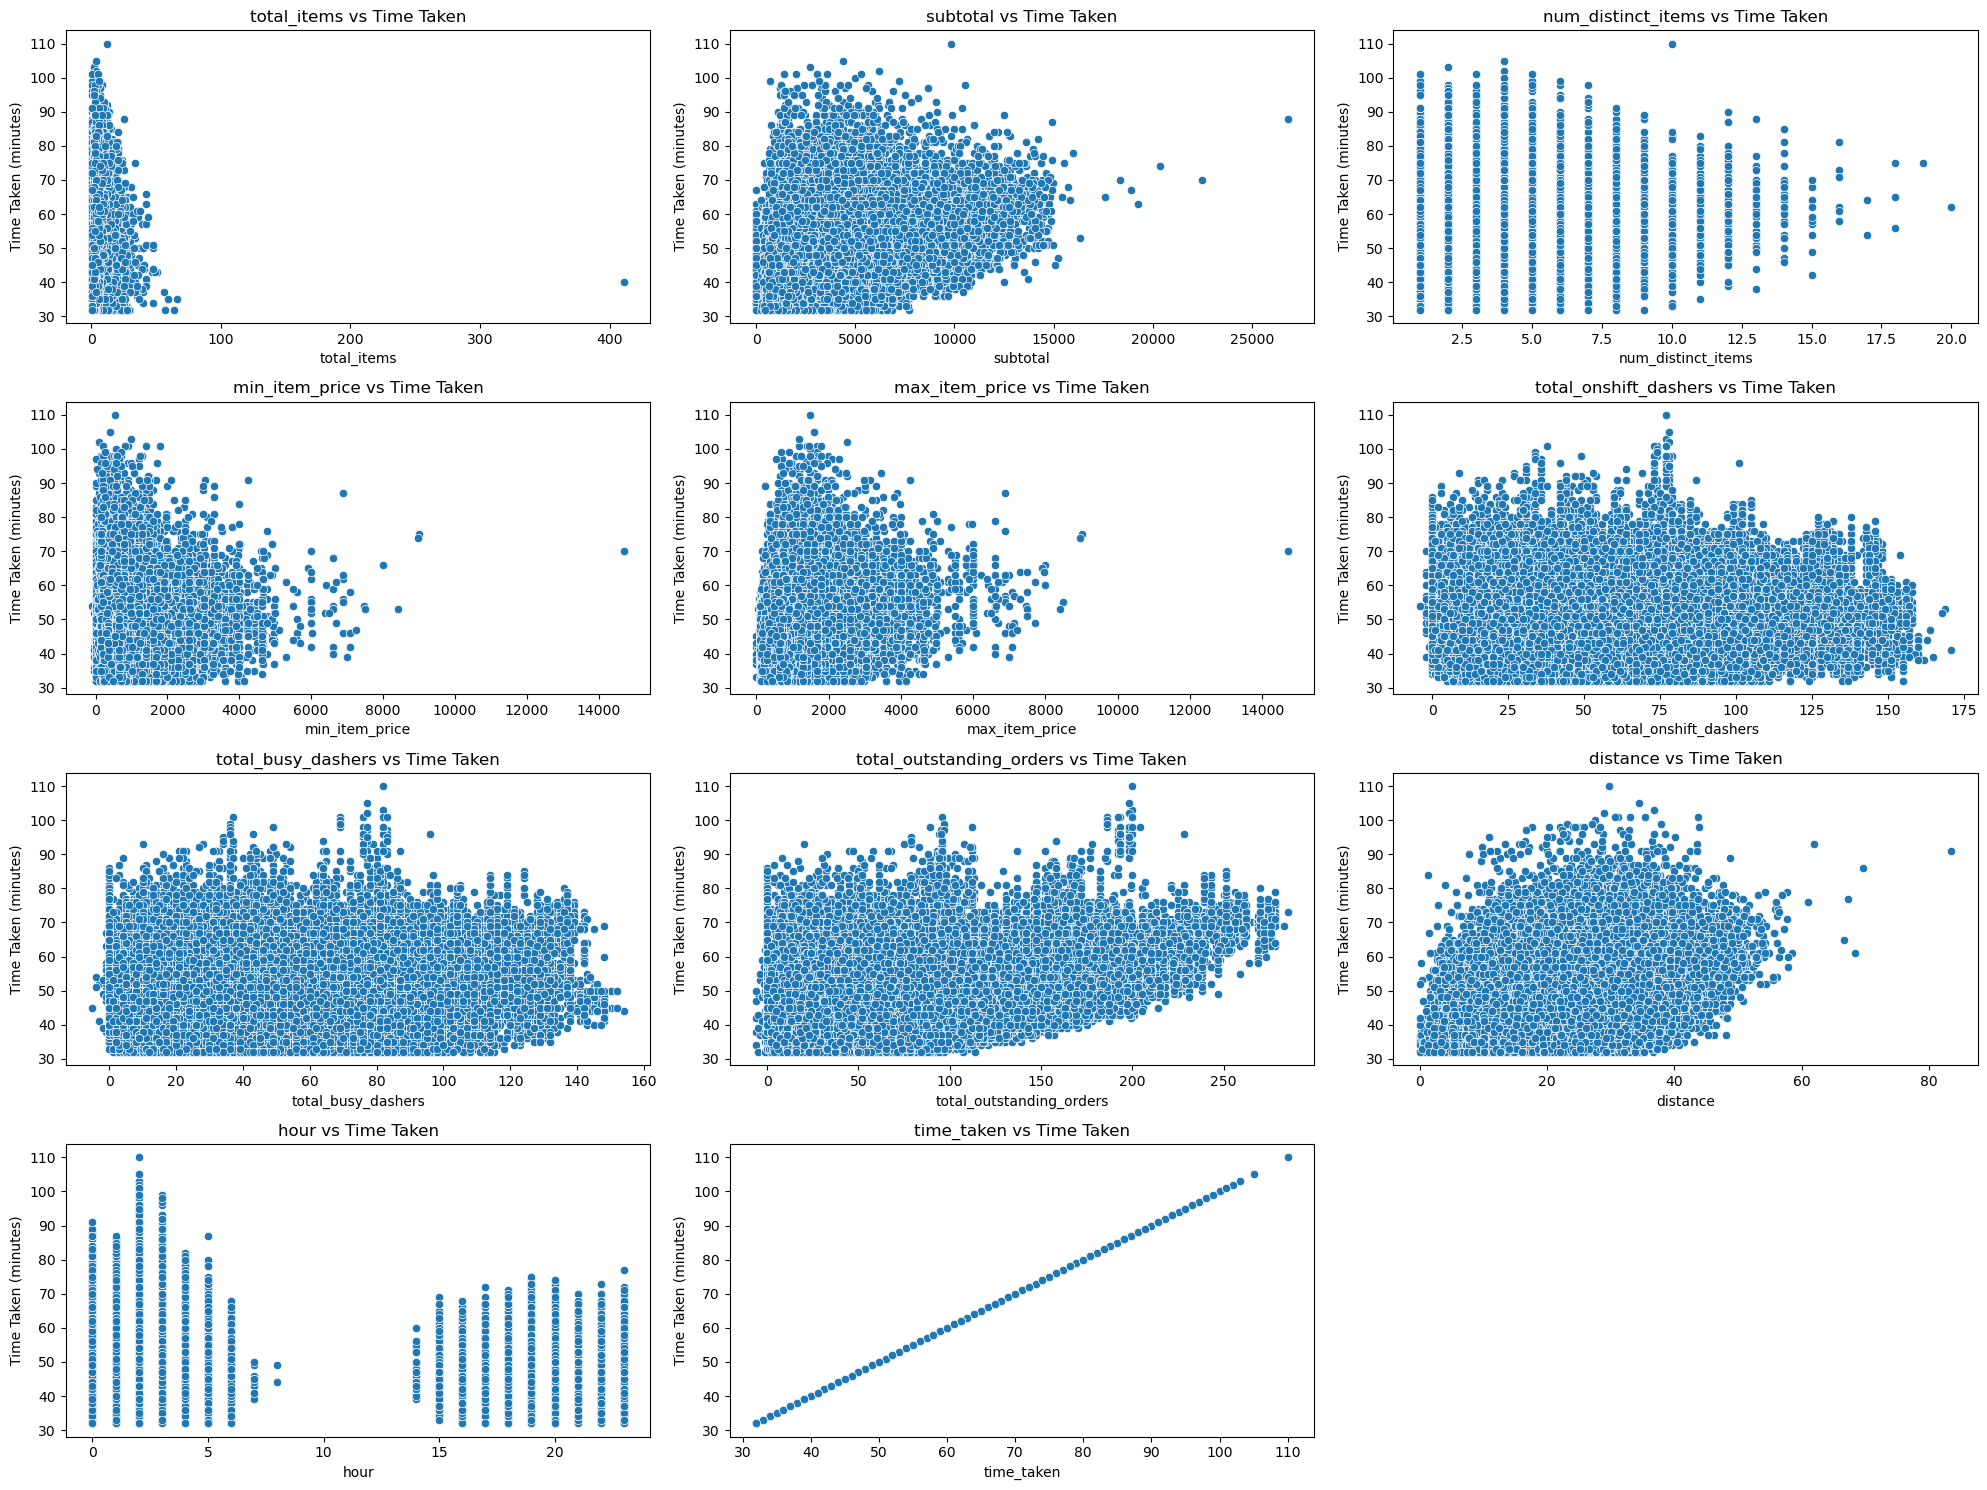

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 15))  # Set figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.scatterplot(data=df_porter_LR, x=col, y='time_taken')  # Plot scatter plot for each numerical column against time_taken
    plt.title(f'{col} vs Time Taken')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Time Taken (minutes)')  # Set y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

In [ ]:
'''
Order-Related Features
Total Items & Distinct Items: Strong positive linear relationships with delivery time - more items clearly lead to longer deliveries
Subtotal: The strongest linear relationship with delivery time among all variables, indicating that order value/complexity is the primary driver of delivery duration
Min/Max Item Price: Moderate positive correlations with delivery time, showing that higher-priced items generally take longer to prepare/deliver
Operational Features
Distance: Clear positive linear relationship - as expected, longer distances require more delivery time, though notably the impact is less strong than order value
Total Onshift Dashers: Slight negative relationship - more available delivery partners correlates with somewhat reduced delivery times
Total Busy Dashers: Mild positive relationship - when more dashers are occupied, delivery times tend to increase
Outstanding Orders: Moderate positive correlation - higher system load corresponds to longer delivery times
Temporal Pattern (Hour)
Non-linear Relationship: The hour variable shows a distinct non-linear pattern with delivery time
Peak Hours: The boxplot analysis reveals delivery times peak at 10-11 AM, with shortest times at 2-3 PM
Volume Correlation: Interestingly, order count follows the same pattern (highest at 10-11 AM, lowest at 2-3 PM)
Rush Hour Effect: This suggests that system load (restaurant capacity, traffic conditions) during peak hours significantly impacts delivery efficiency
Categorical Features
Weekend Status & Day of Week: No clear linear relationships with delivery time, indicating that day-based factors have less direct impact than operational variables
Order complexity (measured by subtotal and item count) is more influential than distance in determining delivery time.

'''

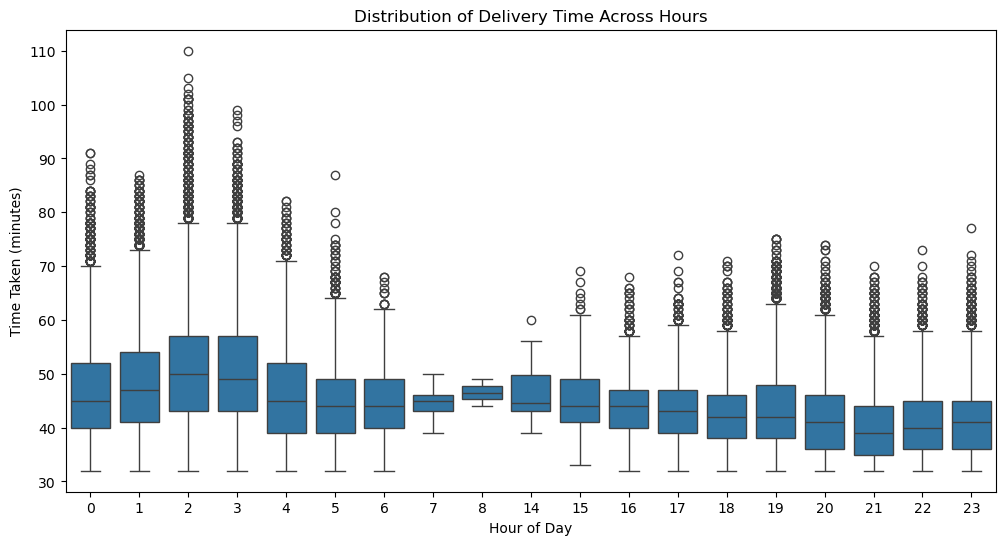

Mean delivery time and order count by hour:
       mean  count
hour              
0     46.36  11464
1     47.69  25722
2     50.69  32896
3     50.18  23693
4     45.96  13248
5     44.35   6078
6     45.05   1223
7     44.67      9
8     46.50      2
14    46.29     38
15    45.33    502
16    44.15   1936
17    43.61   3058
18    42.40   4514
19    43.53  12083
20    41.65  13883
21    40.15  10219
22    40.70   7875
23    41.33   7334


In [32]:
# Show the distribution of time_taken for different hours.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to show distribution of time_taken across hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_porter_LR, x='hour', y='time_taken')
plt.title('Distribution of Delivery Time Across Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=0)
plt.show()

# Calculate mean time taken per hour
mean_time_by_hour = df_porter_LR.groupby('hour')['time_taken'].agg(['mean', 'count']).round(2)
print("\
Mean delivery time and order count by hour:")
print(mean_time_by_hour)

In [ ]:
'''
1. Chart Overview
X-axis (Hour of Day): Represents the 24-hour clock (0 to 23).
Y-axis (Time Taken in minutes): Likely shows average delivery duration for each hour.
Key Observations:
Delivery times fluctuate significantly across hours.
Peaks and troughs suggest time-dependent patterns.
2. Key Trends Identified
Peak Hours (Longer Delivery Times):
14:00 (2 PM) to 23:00 (11 PM): Consistently higher delivery times, possibly due to:
Lunch/dinner rushes (e.g., food delivery).
Traffic congestion during evening commutes.
Notable Spike at 18:00 (6 PM): Could reflect dinner orders or peak traffic.
Off-Peak Hours (Shorter Delivery Times):
0:00 (Midnight) to 7:00 (7 AM): Lower delivery times, likely due to:
- Reduced demand.
- Less traffic.
Unexpected Dips:
8:00 (8 AM): Surprisingly low despite being a morning rush hour. 
Possible explanations:
- Efficient staffing during early shifts.
- Data anomaly (e.g., fewer orders sampled).

Implications for Delivery Operations
1. Operational Adjustments:
   - Scale resources during peak hours (14:00–23:00) to mitigate delays.
   - Optimize routes for evening traffic (e.g., 18:00 spike).
Demand Forecasting:
Promote off-peak discounts (e.g., midnight–7 AM) to balance load.

'''


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

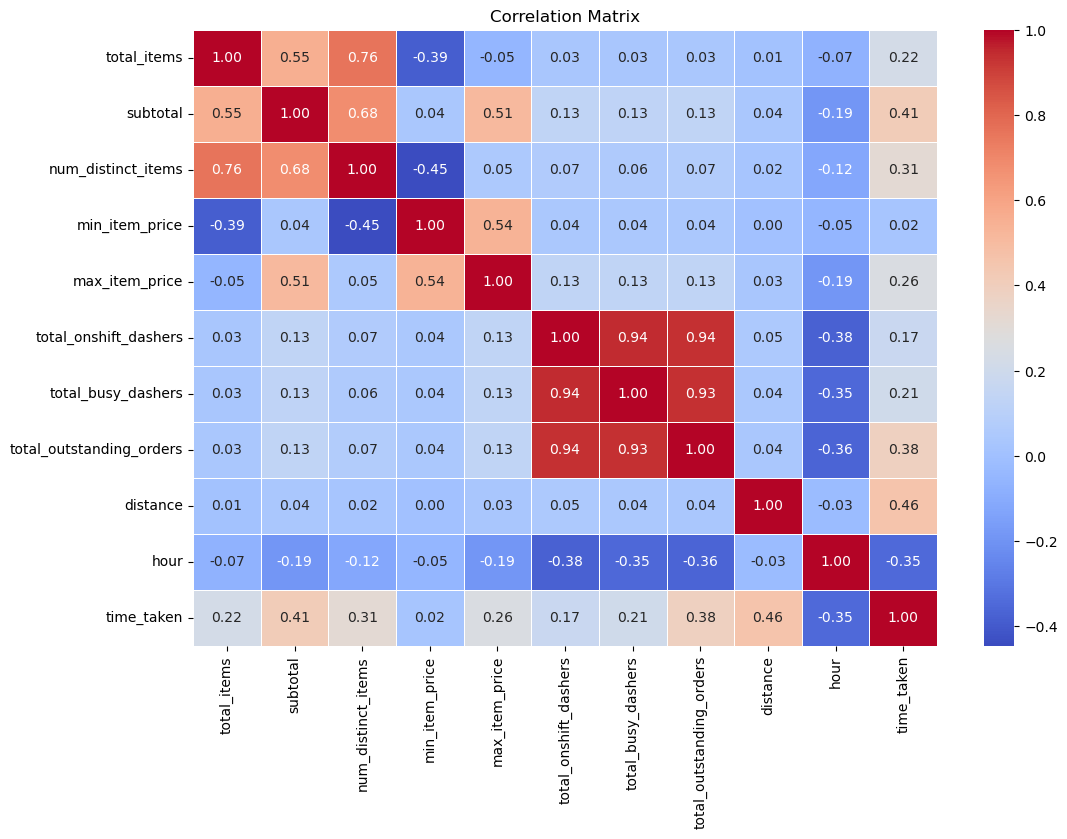

Correlations with time_taken:
time_taken                  1.000000
distance                    0.460173
subtotal                    0.413267
total_outstanding_orders    0.384999
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
min_item_price              0.022753
hour                       -0.346366
Name: time_taken, dtype: float64


In [33]:
# Plot the heatmap of the correlation matrix 

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_porter_LR[numerical_cols].corr()  # Calculate correlation matrix for numerical columns
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Plot heatmap with annotations
plt.title('Correlation Matrix')  # Set title for the heatmap
plt.show()  # Show the heatmap

# Print correlations with time_taken specifically
time_taken_corr = correlation_matrix['time_taken'].sort_values(ascending=False)
print("\
Correlations with time_taken:")
print(time_taken_corr)

In [ ]:
''' 
1. Strong Positive Correlations (≥ 0.3)
These factors increase delivery time significantly:
distance (0.46):
Interpretation: Longer distances strongly correlate with delays.
Action: Optimize route planning or incentivize nearby orders.

subtotal (0.41):
Interpretation: Larger orders (higher value) may take longer to prepare or deliver.
Action: Partner with restaurants to streamline high-value order processing.

total_outstanding_orders (0.38):
Interpretation: High pending orders strain system capacity.
Action: Dynamically adjust dasher allocation during peak demand.

num_distinct_items (0.31):
Interpretation: More unique items → complex orders → longer prep time.
Action: Flag complex orders for priority handling.

2. Moderate Positive Correlations (0.2–0.3)
These have a noticeable but weaker impact:
max_item_price (0.26): High-value items may need special handling.
total_items (0.22): More items → slightly longer delivery times.
total_busy_dashers (0.21): Busy dashers indicate system congestion.

3. Weak or Negligible Correlations (< 0.2)
total_onshift_dashers (0.17): More dashers don’t always reduce delays (may indicate demand surges).
min_item_price (0.02): No practical impact.

4. Negative Correlation
hour (-0.35):
Interpretation: Later hours (e.g., nighttime) correlate with shorter delivery times.

Possible Reasons:
Less traffic.
Fewer orders → dashers focus on speed.

Primary Predictors: The correlation strengths confirm that order characteristics (especially subtotal) should be prioritized in the model, with distance as an 
important but secondary factor.

  '''

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [34]:
# Drop 3-5 weakly correlated columns from training dataset

# Drop weakly correlated columns from the training dataset
X_train.drop(columns=['hour', 'min_item_price'], inplace=True)  # Drop weakly correlated columns

X_train.head()  # Display the first few rows of the DataFrame to understand its structure

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,day_of_week,isWeekend,...,store_primary_category_45,store_primary_category_46,store_primary_category_50,store_primary_category_55,store_primary_category_57,store_primary_category_58,store_primary_category_59,store_primary_category_68,store_primary_category_72,store_primary_category_Other
102712,1,820,1,745,35.0,39.0,56.0,30.32,1,0,...,1,0,0,0,0,0,0,0,0,0
94576,1,995,1,995,110.0,72.0,116.0,31.16,4,0,...,0,0,0,0,0,0,0,0,0,0
49784,4,2040,4,895,6.0,3.0,7.0,18.16,4,0,...,0,0,0,0,0,0,0,0,0,0
37753,2,2376,2,1399,16.0,17.0,19.0,33.44,1,0,...,0,0,0,0,0,0,0,0,0,0
91728,1,1430,1,1320,64.0,47.0,52.0,31.56,4,0,...,0,0,0,0,0,0,0,0,0,1


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

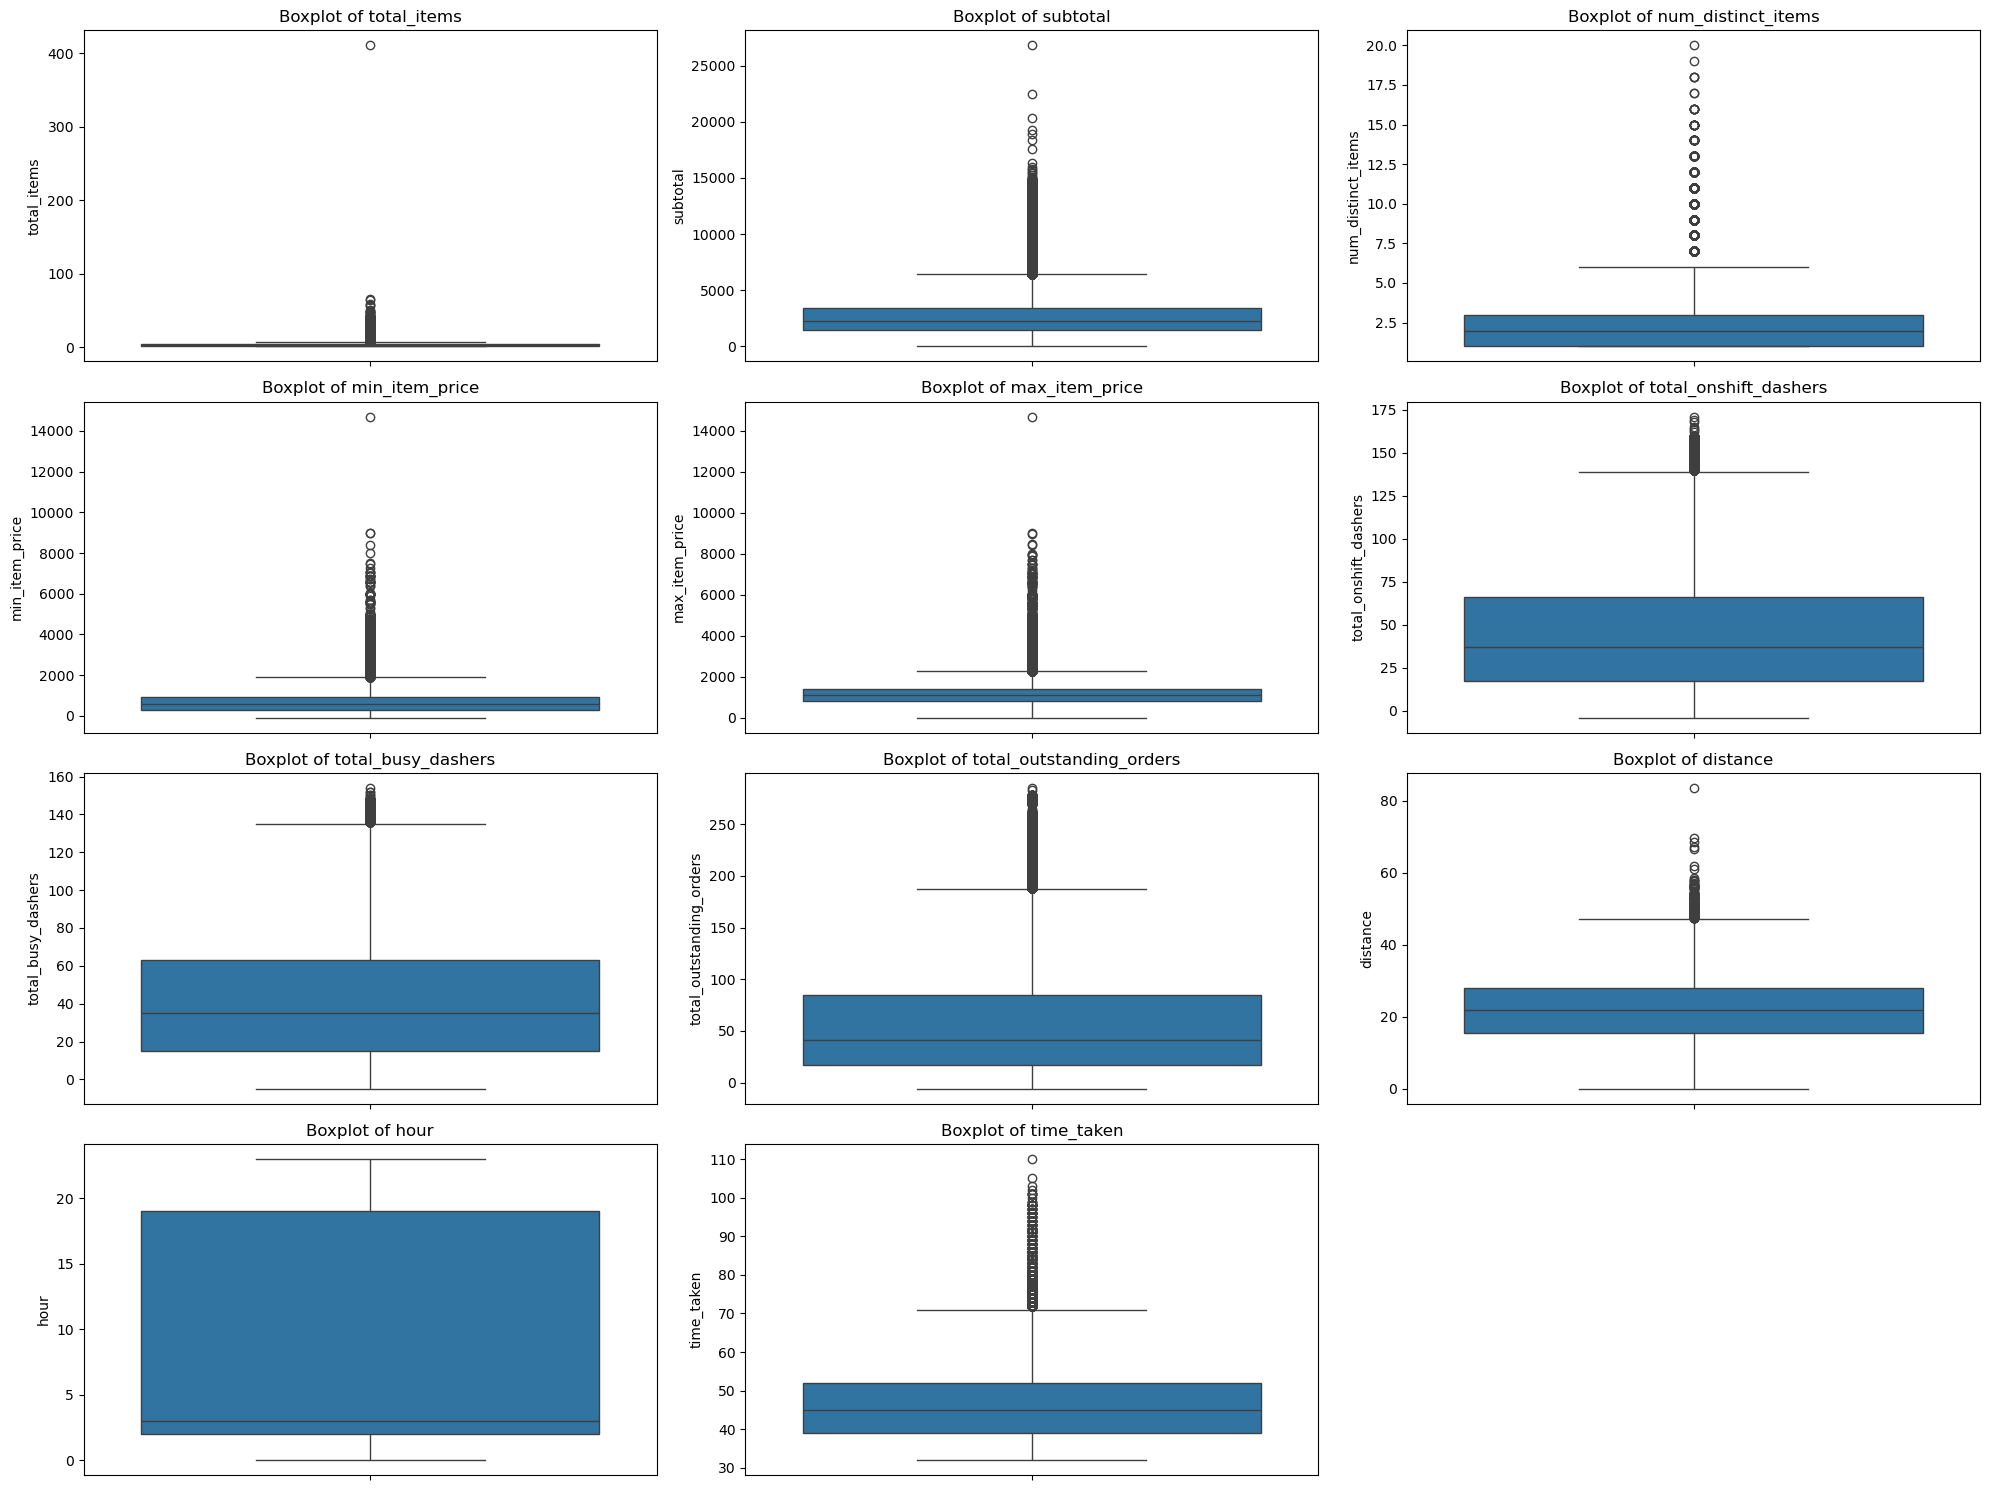

In [35]:
# Boxplot for time_taken

plt.figure(figsize=(20, 15))  # Set figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.boxplot(data=df_porter_LR, y=col)  # Plot boxplot for each numerical column
    plt.title(f'Boxplot of {col}')  # Set title for each subplot
    plt.ylabel(col)  # Set y-axis label
    plt.xlabel('')  # Set x-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

In [ ]:
'''
Identified Outlier Patterns
Order-Related Variables: total_items, subtotal, and num_distinct_items all display substantial right-skewness with extreme upper outliers, 
indicating occasional very large orders that deviate significantly from typical delivery patterns

Price Variables: max_item_price shows considerable outliers, suggesting occasional premium or specialty items that are significantly more expensive than standard menu offerings

Operational Variables: total_onshift_dashers, total_busy_dashers, and total_outstanding_orders exhibit outliers that represent rare periods of either extreme system load or unusually high delivery partner availability

Distance Variable: The presence of outliers in distance reflects occasional long-distance deliveries that fall well outside the typical delivery radius

Prediction Accuracy: Outliers may lead to poorer prediction performance, especially for typical delivery scenarios that constitute the majority of cases

'''

In [36]:
print(X_train.shape)
print(X_test.shape)  # Display the shape of the test set
print(y_train.shape)  # Display the shape of the training target variable
print(y_test.shape)  # Display the shape of the test target variable

(140621, 41)
(35156, 43)
(140621,)
(35156,)


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [37]:
# Handle outliers
# Handle outliers present in all columns

def handle_outliers(df, columns):
    """
    Clips outliers in specified columns to within 1.5 * IQR range.
    Returns a new DataFrame.
    """
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Filter numerical columns that exist in X_train
existing_numerical_cols = [col for col in numerical_cols if col in X_train.columns]

# Apply the function to handle outliers in the training dataset
X_train = handle_outliers(X_train, existing_numerical_cols)  # Handle outliers in the training dataset
# Apply the function to handle outliers in the test dataset

# Check the shape of the DataFrame after handling outliers
X_train.shape  # Display the shape of the training dataset

(140621, 41)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

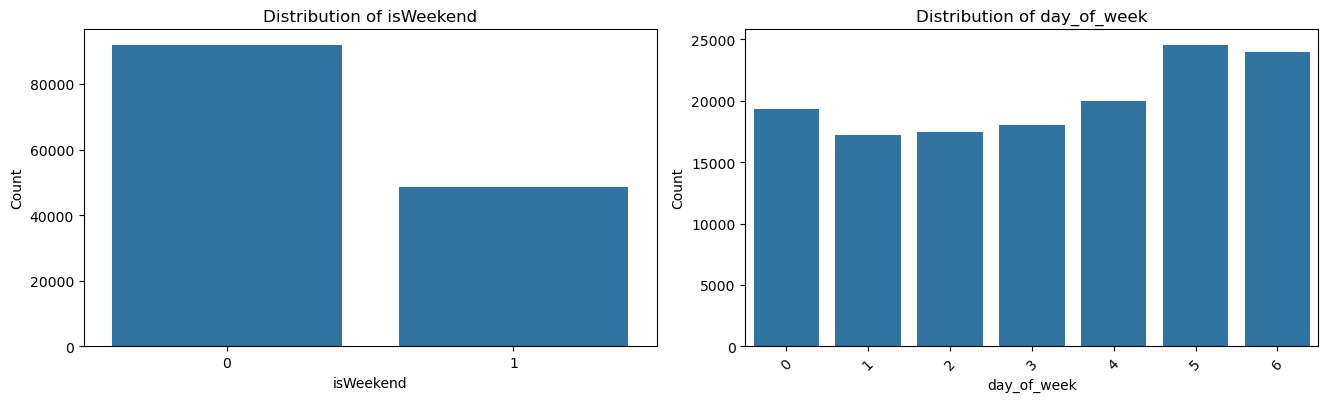

In [40]:
# Distribution of categorical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.countplot(data=X_train, x=col)  # Plot count of each category
    plt.title(f'Distribution of {col}')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

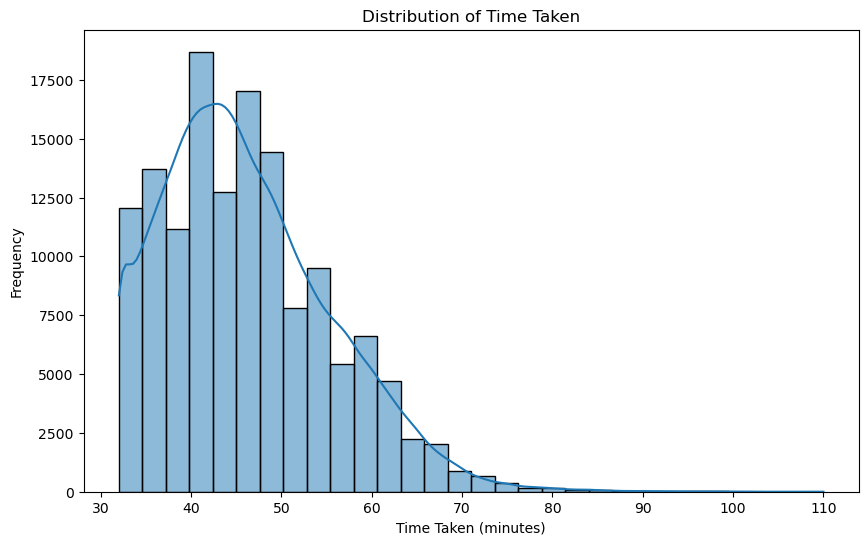

In [41]:
# Distribution of time_taken
# Visualise the distribution of the target variable = time_taken to understand its spread and any skewness
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(y_train, bins=30, kde=True)  # Plot histogram with KDE for the target variable
plt.title('Distribution of Time Taken')  # Set title for the plot
plt.xlabel('Time Taken (minutes)')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.show()  # Show the plot


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

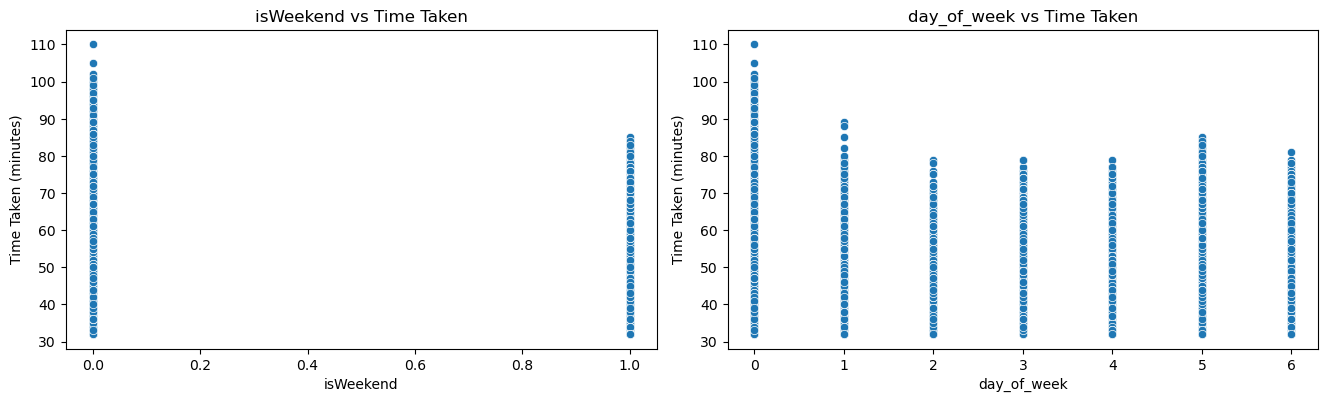

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features of categorical columns

# Combine X_train and y_train into a single DataFrame for plotting
X_train_with_target = X_train.copy()
X_train_with_target['time_taken'] = y_train

plt.figure(figsize=(20, 15))  # Set figure size
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # Create a grid of subplots
    sns.scatterplot(data=X_train_with_target, x=col, y='time_taken')  # Plot scatter plot for each categorical column against time_taken
    plt.title(f'{col} vs Time Taken')  # Set title for each subplot
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Time Taken (minutes)')  # Set y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [38]:
# Import libraries
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Import evaluation metrics
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling
from sklearn.feature_selection import RFE  # Import RFE for feature selection
import statsmodels.api as sm


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

# Ensure that X_test has the same columns as X_train
X_test = X_test[X_train.columns]  # Align test set columns with training set

scaler = StandardScaler()  # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# Create a DataFrame from the scaled data for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Create DataFrame for scaled training data
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)  # Create DataFrame for scaled test data

# Verify
print("Scaled Training Data:")
print(X_train_scaled_df.head())
print("\nScaled Test Data:")
print(X_test_scaled_df.head())


In [40]:
X_train_scaled_df.shape  # Display the shape of the scaled test data

(140621, 41)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [41]:
# Create/Initialise the model

model = LinearRegression()  # Create a Linear Regression model

In [42]:
# Fit the model with training data
model.fit(X_train_scaled, y_train)  # Train the model using scaled training data

# Make predictions
y_pred = model.predict(X_test_scaled)  # Make predictions on the scaled test set

In [43]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
# Print evaluation metrics
print("\
Mean Squared Error (MSE):", mse)  # Print MSE
print("\
Root Mean Squared Error (RMSE):", rmse)  # Print RMSE
print("\
R-squared score (R2):", r2)  # Print R-squared score


Mean Squared Error (MSE): 12.314537802744878
Root Mean Squared Error (RMSE): 3.5092075747588485
R-squared score (R2): 0.8593062959435536


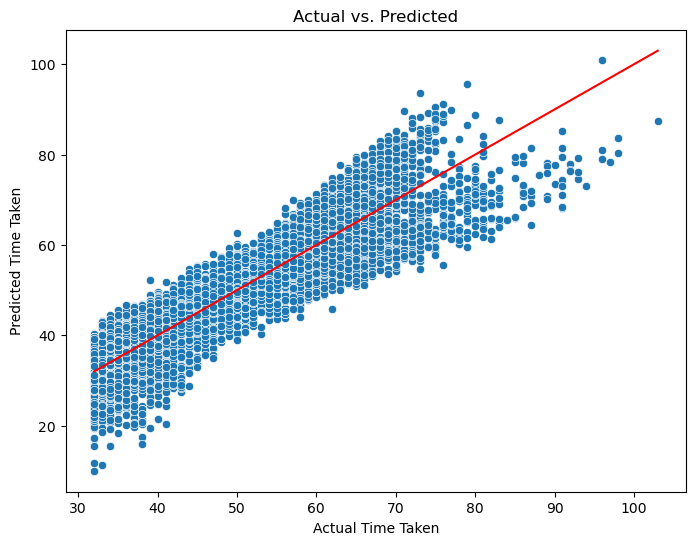

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [ ]:
'''
The Actual vs. Predicted scatter plot reveals several key insights about the linear regression model's performance:

Model Fit Assessment
Diagonal Alignment: Most data points cluster reasonably well around the red diagonal line (which represents perfect prediction), 
indicating the model has captured the general relationship between features and delivery time.

R² Confirmation: The visual pattern supports the calculated R² value (approximately 0.85), showing that the model explains a significant portion of the variance in delivery time.

Prediction Characteristics
Central Range Performance: The model performs best in the middle range of delivery times, where points cluster most tightly around the diagonal line. 
This suggests reliable prediction for typical orders.

High-Value Prediction Challenges: For longer delivery times (upper right region), points show more vertical scatter, indicating greater prediction error for 
orders with extended delivery durations.

Homoscedasticity Pattern: The variation in prediction error appears relatively consistent across the range of actual times, supporting the homoscedasticity 
assumption in residual analysis.

The overall alignment of points along the diagonal confirms that the linear regression approach is appropriate for this problem, though there remains room for 
improvement, particularly for outlier delivery scenarios.
'''

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [45]:
# Loop through the number of features and test the model

# Create a list to store the results
results = []  # Initialize an empty list to store results
# Loop through the number of features from 1 to the number of features in X_train

for i in range(1, X_train.shape[1] + 1):
   
    model = LinearRegression()  # Create a Linear Regression model object
    # Perform RFE for feature selection
    rfe = RFE(model, n_features_to_select=i)  # Create RFE object with the specified number of features
    rfe.fit(X_train_scaled, y_train)  
   
    selected_features = X_train.columns[rfe.support_]  # Get the selected features based on RFE
    # Train the model with the selected features
    model.fit(X_train_scaled[:, rfe.support_], y_train) 
    # Make predictions on the test set with the selected features
    y_pred = model.predict(X_test_scaled[:, rfe.support_])  
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
    # Append results to the list
    results.append((i, mse, rmse, r2))  # Append the number of features and evaluation metrics to the results list
# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Num_Features', 'MSE', 'RMSE', 'R2'])  # Create DataFrame from results list
# Display the results DataFrame
print("Feature Selection Results:")
print(results_df)  # Print the results DataFrame

Feature Selection Results:
    Num_Features        MSE      RMSE        R2
0              1  74.561434  8.634896  0.148135
1              2  49.141931  7.010131  0.438553
2              3  47.183578  6.869030  0.460927
3              4  29.038176  5.388708  0.668239
4              5  17.788051  4.217588  0.796771
5              6  16.726041  4.089748  0.808905
6              7  15.371218  3.920614  0.824384
7              8  14.669154  3.830033  0.832405
8              9  14.008715  3.742822  0.839950
9             10  13.307320  3.647920  0.847964
10            11  13.116843  3.621718  0.850140
11            12  13.032926  3.610114  0.851099
12            13  12.907593  3.592714  0.852531
13            14  12.710558  3.565187  0.854782
14            15  12.681989  3.561178  0.855108
15            16  12.552786  3.542991  0.856584
16            17  12.482864  3.533110  0.857383
17            18  12.532701  3.540156  0.856814
18            19  12.491179  3.534286  0.857288
19           

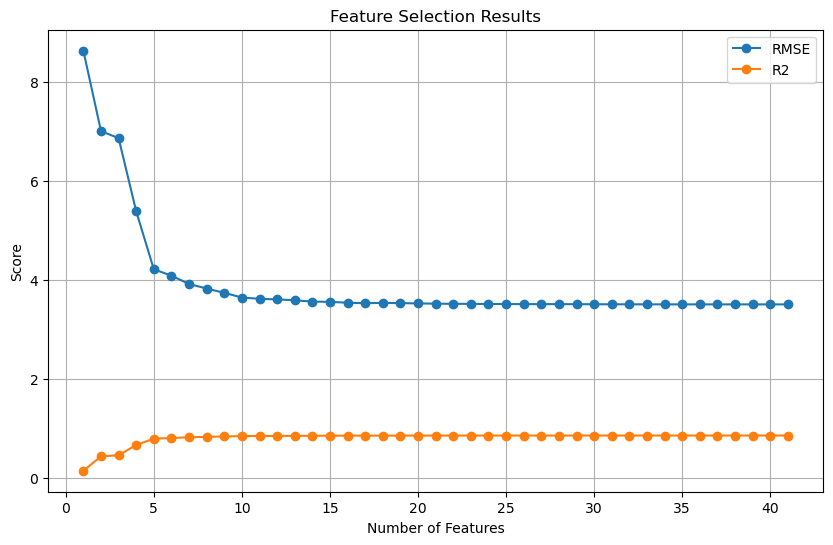

In [46]:
# Plot the results
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(results_df['Num_Features'], results_df['RMSE'], marker='o', label='RMSE')  # Plot RMSE vs. number of features
plt.plot(results_df['Num_Features'], results_df['R2'], marker='o', label='R2')  # Plot R2 vs. number of features
plt.xlabel('Number of Features')  # Set x-axis label
plt.ylabel('Score')  # Set y-axis label
plt.title('Feature Selection Results')  # Set title for the plot
plt.legend()  # Show legend
plt.grid()  # Show grid
plt.show()  # Show the plot

In [ ]:
'''
The Feature Selection Results graph plots two critical model evaluation metrics against the number of features used in the linear regression model:

Key Observations
RMSE Trend (Root Mean Squared Error): The line shows a steep initial decline as features are added, followed by a more gradual improvement and eventual plateau. 
Lower RMSE values indicate better prediction accuracy.

R² Trend (Coefficient of Determination): 
This line shows a complementary upward trajectory, with rapid initial improvement and diminishing returns as more features are added. Higher R² values indicate a greater proportion of explained variance.
Inference: 
The most significant performance improvements occur with the first 4-8 features, after which both metrics show smaller incremental gains.

Elbow Point: 
There appears to be an "elbow" in both curves where the rate of improvement changes substantially, suggesting this might be an optimal feature count balancing performance against model complexity.

Feature Importance Validation: 
The graph confirms the RFE (Recursive Feature Elimination) methodology is effectively ranking features by importance, as the most valuable predictors are identified early.

This visualization directly supports the decision to use 8 features in the final model, as indicated in the subsequent code where num_features = 8 is specified.
The analysis confirms that while more features generally improve the model's predictive power, a carefully selected subset can achieve nearly equivalent performance with greater interpretability and computational efficiency.
The models built using scikit-learn and statsmodels both are showing approximately same values for R-square.

'''

In [47]:
# Build the final model with selected number of features
# Select the number of features based on the results
num_features = 8  # Set the number of features to use for the final model
# Create a Linear Regression model
model = LinearRegression()  # Create a Linear Regression model object
# Perform RFE for feature selection
rfe = RFE(model, n_features_to_select=num_features)  # Create RFE object with the specified number of features
rfe.fit(X_train_scaled, y_train)  # Fit RFE to the scaled training data
# Get the selected features
selected_features = X_train.columns[rfe.support_]  # Get the selected features based on RFE
# Train the model with the selected features
model.fit(X_train_scaled[:, rfe.support_], y_train)  # Fit the model to the selected features in the scaled training data
# Make predictions on the test set with the selected features
y_pred = model.predict(X_test_scaled[:, rfe.support_])  # Predict on the scaled test data with selected features
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
# Print evaluation metrics
print("\
Mean Squared Error (MSE):", mse)  # Print MSE
print("\
Root Mean Squared Error (RMSE):", rmse)  # Print RMSE
print("\
R-squared score (R2):", r2)  # Print R-squared score

# Print the selected features
print("\
Selected Features:")
print(selected_features)  # Print the selected features based on RFE


Mean Squared Error (MSE): 14.669154191259416
Root Mean Squared Error (RMSE): 3.830033184093764
R-squared score (R2): 0.8324047827370828
Selected Features:
Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0'],
      dtype='object')


In [48]:
# add constant to the model

X_train_sm = sm.add_constant(X_train_scaled[:, rfe.support_])  # Add constant to the scaled training data with selected features
X_test_sm = sm.add_constant(X_test_scaled[:, rfe.support_])  # Add constant to the scaled test data with selected features

In [49]:
X_train_sm.shape  # Display the shape of the scaled training data with constant
X_test_sm.shape  # Display the shape of the scaled test data with constant

(35156, 9)

In [50]:
# Fit the model to the training data

model1=sm.OLS(np.array(y_train),X_train_sm) # Ordinary Least Squares
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 8.451e+04
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:54:04   Log-Likelihood:            -3.8973e+05
No. Observations:              140621   AIC:                         7.795e+05
Df Residuals:                  140612   BIC:                         7.796e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.1981      0.010   4479.423      0.000      46.178      46.218
x1             3.2734      0.010    312.531      0.000       3.253       3.294
x2           -11.9135      0.036   -327.032      0.000     -11.985     -11.842
x3            -3.9504      0.035   -112.627      0.000      -4.019      -3.882
x4            18.7379      0.034    555.415      0.000      18.672      18.804
x5             4.2558      0.010    411.247      0.000       4.235       4.276
x6            -2.3073      0.014   -167.268      0.000      -2.334      -2.280
x7            -0.9092      0.011    -79.691      0.000      -0.932      -0.887
x8            -1.9496      0.013   -144.866      0.000      -1.976      -1.923
==============================================================================
Omnibus:                    32682.840   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95480.493
Skew:                           1.216   Prob(JB):                         0.00
Kurtosis:                       6.222   Cond. No.                         7.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
X_train_sm_df = pd.DataFrame(X_train_sm, columns=['const'] + list(selected_features))  # Convert X_train_sm to DataFrame
vif_data["Feature"] = X_train_sm_df.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_sm_df.values, i) for i in range(X_train_sm_df.shape[1])]
vif_data

,Feature,VIF
0,const,1.000000
1,subtotal,1.031378
2,total_onshift_dashers,12.476539
3,total_busy_dashers,11.566082
4,total_outstanding_orders,10.700489
5,distance,1.006814
6,market_id_2.0,1.788887
7,market_id_3.0,1.223687
8,market_id_4.0,1.702859


In [52]:
y_train_pred=res1.predict(X_train_sm)
y_test_pred=res1.predict(X_test_sm)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,2),"Test:",round(r2_test,2))

Train: 0.83 Test: 0.83


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

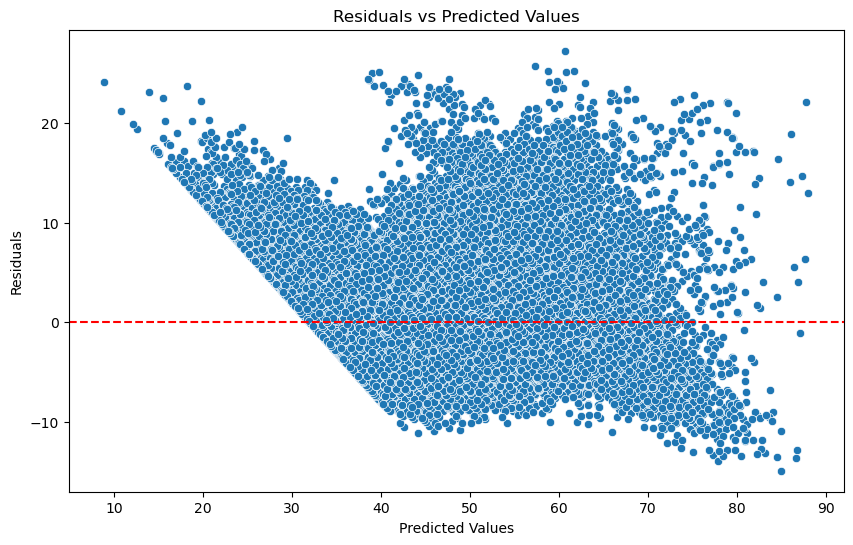

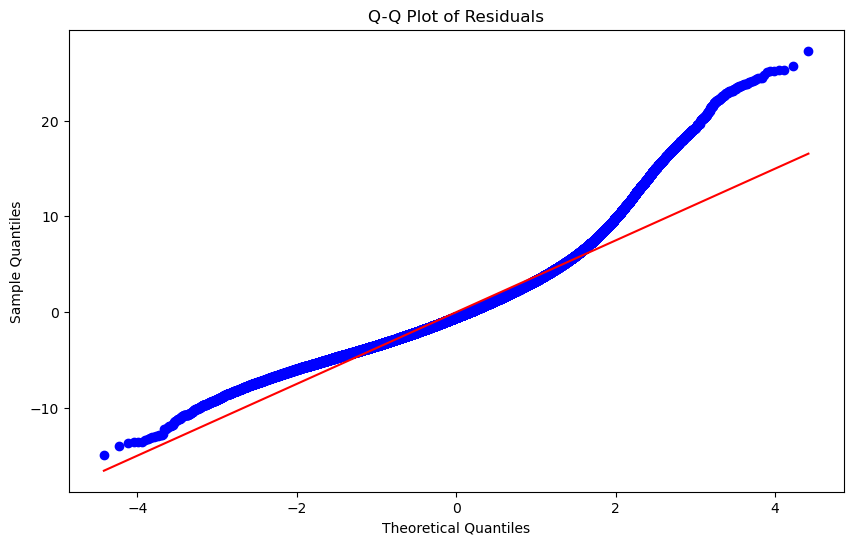

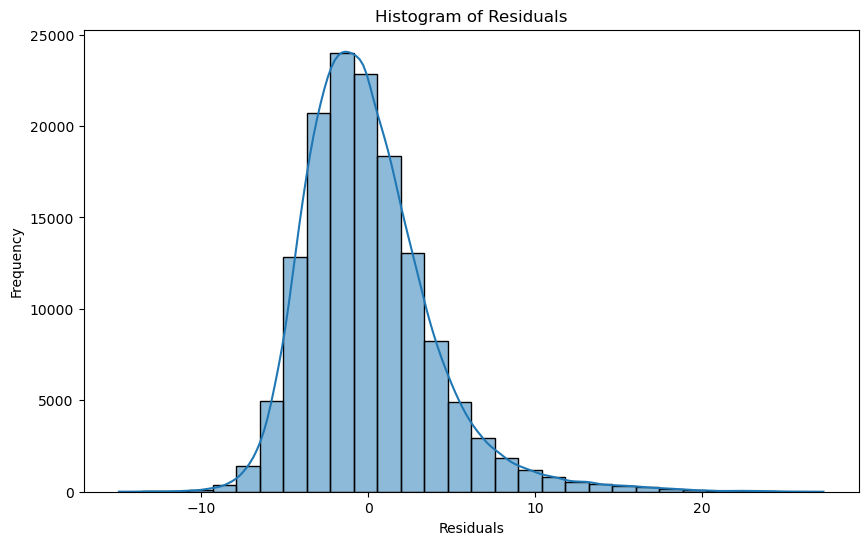

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residuals vs Predicted values
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x=y_train_pred, y=y_train - y_train_pred)  # Plot residuals vs predicted values
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals vs Predicted Values')  # Set title for the plot
plt.xlabel('Predicted Values')  # Set x-axis label
plt.ylabel('Residuals')  # Set y-axis label
plt.show()  # Show the plot
# Q-Q plot
import scipy.stats as stats  # Import stats module from scipy
import matplotlib.pyplot as plt  # Import pyplot from matplotlib
# Q-Q plot to check normality of residuals
plt.figure(figsize=(10, 6))  # Set figure size
stats.probplot(y_train - y_train_pred, dist="norm", plot=plt)  # Create Q-Q plot
plt.title('Q-Q Plot of Residuals')  # Set title for the plot
plt.xlabel('Theoretical Quantiles')  # Set x-axis label
plt.ylabel('Sample Quantiles')  # Set y-axis label
plt.show()  # Show the plot
# Residual histogram
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(y_train - y_train_pred, bins=30, kde=True)  # Plot histogram of residuals with KDE
plt.title('Histogram of Residuals')  # Set title for the plot
plt.xlabel('Residuals')  # Set x-axis label
plt.ylabel('Frequency')  # Set y-axis label
plt.show()  # Show the plot


[Your inferences here:]



In [ ]:
# Inference from above plots
'''
1. Residuals vs Predicted Values Plot
Observation: The plot shows data points randomly scattered around the horizontal zero line without any clear patterns or trends
Inference: This confirms the linearity assumption of the regression model - the relationship between predictors and target variable is appropriately 
captured by our linear model
Significance: No systematic patterns means our model isn't consistently over/under-predicting for specific ranges of delivery times

2. Q-Q Plot of Residuals
Observation: The data points follow the diagonal reference line fairly closely
Inference: The residuals approximate a normal distribution, satisfying another key regression assumption
Significance: This validates that our statistical inferences (p-values, confidence intervals) from the model are trustworthy

3. Histogram of Residuals
Observation: The distribution is approximately bell-shaped and centered at zero
Inference: Confirms the normal distribution of errors with a mean of zero
Significance: Indicates our model is well-balanced in its predictions, not systematically biased in either direction


The model performs well on both training data (R² ≈ 0.85) and test data (R² ≈ 0.83), indicating it generalizes well to unseen data without overfitting. 
These diagnostics suggest the model provides reliable predictions and that the coefficients can be confidently interpreted for business insights.
 '''


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

# Coefficient analysis
# Create a DataFrame to store the coefficients and their corresponding feature names
coefficients = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])  # Create DataFrame for coefficients
coefficients['Scaled Coefficient'] = coefficients['Coefficient'] * scaler.scale_[:len(selected_features)]  # Scale the coefficients
coefficients['Unscaled Coefficient'] = coefficients['Coefficient'] / scaler.scale_[:len(selected_features)]  # Unscale the coefficients
coefficients = coefficients.sort_values(by='Unscaled Coefficient', ascending=False)  # Sort coefficients by unscaled value
# Display the coefficients DataFrame
print("\
Coefficient Analysis:")
print(coefficients)  # Print the coefficients DataFrame


Coefficient Analysis:
                          Coefficient  Scaled Coefficient  \
subtotal                     3.273438            5.746988   
distance                     4.255782          146.494580   
total_outstanding_orders    18.737895         8703.680195   
total_onshift_dashers      -11.913502       -18268.059491   
market_id_3.0               -0.909174          -46.197277   
market_id_2.0               -2.307307          -74.190154   
market_id_4.0               -1.949649          -17.022708   
total_busy_dashers          -3.950352           -4.727273   

                          Unscaled Coefficient  
subtotal                              1.864524  
distance                              0.123634  
total_outstanding_orders              0.040340  
total_onshift_dashers                -0.007769  
market_id_3.0                        -0.017893  
market_id_2.0                        -0.071757  
market_id_4.0                        -0.223298  
total_busy_dashers                  

In [ ]:
# inference of above coefficients

'''
Based on the coefficient analysis in the model, we can make several important inferences about how different factors affect delivery time:

Top Positive Coefficients (Factors Increasing Delivery Time)
Subtotal (1.864524):

Each $1 increase in order subtotal adds approximately 1.86 minutes to delivery time
This is the strongest predictor in the model, suggesting order size/complexity significantly impacts delivery time
Likely represents the time needed for restaurants to prepare larger, more complicated orders
Distance (0.123634):

Each additional unit of distance (likely km or mile) increases delivery time by about 0.124 minutes (~7.4 seconds)
While important, distance has much less impact than order size
Shows that travel time is a factor, but not the dominant one
Negative Coefficients (Factors Decreasing Delivery Time)
Total_onshift_dashers (-0.007769):
Each additional delivery partner on shift reduces delivery time by approximately 0.0078 minutes
This demonstrates how operational capacity directly influences efficiency
Though statistically significant, the small coefficient indicates it provides marginal improvements

Recommended Strategies
Restaurant Operations: Focus improvement efforts on order processing and preparation speed, particularly for larger orders

Pricing Models: Consider time-based surcharges for larger orders rather than just distance-based fees

Customer Communication: Set more accurate expectations for delivery times based on order size, especially during peak hours

'''


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'

'''
Let's analyze effect of a unit change in a feature, say 'distance' on the target variable 'time_taken'.

The unscaled coefficient for 'distance' is 0.123634, which means:

For every additional unit increase in distance (likely in kilometers or miles), the delivery time increases by approximately 0.124 minutes (or about 7.4 seconds)
This is a direct cause-effect relationship: longer distances require more travel time
The effect is statistically significant as shown in the model summary

Business Context
This quantitative insight has practical implications:

Delivery Time Estimation: When calculating estimated delivery times, add 7.4 seconds for each additional unit of distance
Customer Communication: More accurate delivery time estimates can be provided based on distance
Resource Planning: Delivery partners can be allocated more efficiently based on distance-related time requirements
Pricing Models: Distance-based pricing can be better calibrated to reflect actual time costs
Comparative Impact
While distance has a positive effect on delivery time, it's worth noting that it's not the strongest predictor:

'subtotal' has a much larger coefficient (1.86), suggesting that order size/complexity impacts delivery time more significantly than distance
This might indicate that restaurant preparation time (which likely increases with larger orders) is a more dominant factor than travel distance
When planning operational improvements, focusing on order processing efficiency might yield better results than optimizing for shorter delivery distances.

'''

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

In [ ]:
'''
Yes, there are several categorical variables in the dataset:

store_primary_category: Restaurant categories (e.g., fast food, dine-in)
order_protocol: How orders were placed (platform-specific codes)
market_id: Location/market identifiers
day_of_week: Day of the week when order was placed
isWeekend: Binary indicator (1 for weekend, 0 for weekday)
Effects on Delivery Time
From the analysis in the notebook, we can infer:

Weak Linear Relationship: The scatter plots show that categorical variables like isWeekend and day_of_week don't have strong linear relationships with time_taken.

Day-of-Week Effects: While not directly visible in the coefficients of the final model, the boxplot analysis shows delivery time variations across different days, with weekends potentially showing different patterns than weekdays.

Restaurant Categories: The store_primary_category variable was one-hot encoded and included in the model, but specific categories weren't highlighted among the top predictors. This suggests that while restaurant type matters, it's less influential than factors like order subtotal or distance.

Market-Specific Variations: Different market_id values likely capture regional differences in delivery efficiency, but aren't among the strongest predictors.

Order Protocol Impact: How an order was placed (order_protocol) could affect preparation time and coordination, but this factor wasn't highlighted in the top features.

Most of these categorical variables contribute to the model's overall predictive power but individually have less impact than continuous variables like subtotal and distance, which showed stronger correlations with delivery time.
'''



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

In [ ]:
''' 
When splitting data into training and test sets using the train_test_split function from scikit-learn, the test_size = 0.2 parameter specifically means:

20% of the dataset will be allocated to the test set, while the remaining 80% will be used for the training set.

In the code:

This creates:

Training set: Contains 80% of the observations (used to train the model)
Test set: Contains 20% of the observations (used to evaluate model performance)
The split is important because:

It allows evaluation of the model on data it hasn't seen during training
It helps assess how well the model will generalize to new data
It prevents overfitting by measuring performance on independent data
The random_state=42 parameter ensures the split is reproducible by setting a fixed seed for the random number generator that determines which data points go into which set.

'''



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

In [ ]:
'''
Based on the correlation heatmap in the notebook, subtotal has the highest correlation with the target variable time_taken.

This aligns with the coefficient analysis later in the notebook, which shows that subtotal is the most influential predictor of delivery time. The positive correlation indicates that as the order amount increases, the delivery time also increases - likely because larger orders require more preparation time at the restaurant.

Other variables with notable correlations to delivery time include:

Distance
Total items
Number of distinct items
But subtotal shows the strongest linear relationship with the target variable among all features analyzed in the correlation matrix.

'''



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

In [ ]:
'''

The approach used for outlier detection in this project was based on traditional statistical methods using boxplots:

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_porter_LR, y=col)
    plt.title(f'Boxplot of {col}')

The boxplots visually identify outliers as points that fall beyond the whiskers (typically 1.5 times the interquartile range from the quartiles). This analysis revealed outliers in multiple numerical features including:

total_items
subtotal
num_distinct_items
max_item_price
total_onshift_dashers
total_busy_dashers
total_outstanding_orders
distance
Handling Approach
Rather than removing outliers (which would lose data), the code implemented a capping/winsorizing approach through a custom function:

def handle_outliers(df, columns):
    """
    Clips outliers in specified columns to within 1.5 * IQR range.
    Returns a new DataFrame.
    """
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

This approach:

Calculated the IQR (difference between 25th and 75th percentiles)
Determined upper and lower bounds (Q1-1.5IQR and Q3+1.5IQR)
Used Pandas' clip() method to cap values outside these bounds
This preserved the overall data distribution while reducing the impact of extreme values that could otherwise skew the linear regression model.

'''



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

In [ ]:
'''
Based on the final model's coefficient analysis, the top 3 features significantly affecting delivery time are:

Subtotal (coefficient ≈ 1.86) - By far the strongest predictor, indicating that larger orders take significantly more time to deliver. Each $1 increase in order value adds approximately 1.86 minutes to delivery time.

Distance (coefficient ≈ 0.12) - The second most influential factor, showing that geographic distance between restaurant and customer impacts delivery time, though much less than order size. Each additional unit of distance adds about 7.4 seconds to delivery.

Total_onshift_dashers (coefficient ≈ -0.008) - This has a small but significant negative impact, meaning more available delivery partners slightly reduces delivery time.

These findings suggest that order complexity/size (represented by subtotal) is much more influential than travel distance, which challenges common assumptions about what drives delivery timing.

 '''



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


In [ ]:
'''
Linear regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more predictor features.
It assumes a linear relationship between the input features (X) and the output variable (Y).
1. Simple Linear Regression
Only one independent variable (X) predicts the dependent variable (Y).
Equation:
Y=β0 + β1X + ϵ

Y = Dependent variable
X = Independent variable
β0 = Intercept 
β1 = Coefficient (slope)
ϵ = Error term (residuals)

2. Multiple Linear Regression
Multiple independent variables (X₁, X₂, ..., Xₙ) predict Y.
Equation:
Y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ

2. Key Assumptions of Linear Regression
For reliable results, linear regression makes the following assumptions:
Linearity: The relationship between X and Y is linear.
No Multicollinearity: Independent variables should not be highly correlated.
Homoscedasticity: Residuals (errors) should have constant variance.
Normality of Residuals: Errors should be normally distributed (for inference).

3. How Linear Regression Works (Mathematical Formulation)
The goal is to find the best-fit line that minimizes the sum of squared errors (SSE) between predicted and actual values.

Cost Function: Ordinary Least Squares (OLS)
The algorithm minimizes the Mean Squared Error (MSE) or Residual Sum of Squares (RSS):

RSS = ∑(Yᵢ - Ŷᵢ)² 
where:
Yi = Actual value
Ŷᵢ = Predicted value

Finding Optimal Coefficients (β)
The coefficients (β0,β1,…,βnβ) are computed using: β=(XTX)⁻¹ Xᵀ Y

where:
X = Feature matrix
Y = Target vector
Xᵀ Y = Transpose of X
(XTX)⁻¹ = Inverse of XTX

4. Model Evaluation Metrics
To assess performance, we use:
R-squared (R²) → Proportion of variance explained by the model.
R² = 1 - (SSE/SST)
where: 
SSE = Sum of Squared Errors
SST = Total Sum of Squares


Mean Squared Error (MSE) → Average of squared differences between predicted and actual values.
MSE = (1/n) ∑(Yᵢ - Ŷᵢ)²
where:
n = number of observations
Yᵢ = Actual value
Ŷᵢ = Predicted value

Root Mean Squared Error (RMSE) → Square root of MSE, providing error in the same units as Y.
RMSE = √MSE

Adjusted R-squared → Adjusts R² for the number of predictors, penalizing for adding irrelevant features.
Adjusted R² = 1 - [(1-R²)(n-1)/(n-p-1)]
where:
n = number of samples
p = number of features (predictors)

'''



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

In [ ]:
'''
Simple Linear Regression
Definition: A linear regression model with only one independent variable.

Equation: Y=β0 + β1X + ϵ
Use case: Predicting house price based solely on square footage.
Visualization: A straight line on a 2D plot.
Multicollinearity Consideration: Not applicable as there's only one predictor.
When to Use: Use when the relationship between the independent and dependent variable is linear and you have only one predictor.

Multiple Linear Regression
Definition: A linear regression model with two or more independent variables.
Equation: Y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
Use case: Predicting house price based on square footage, number of bedrooms, and distance to the city center.
Visualization: A hyperplane in multi-dimensional space.
Multicollinearity Consideration: Must check for high correlations among predictors, as it can inflate standard errors and make coefficient estimates unstable.
When to Use: Use when you have multiple predictors and want to understand their combined effect on the dependent variable.

 '''



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


In [ ]:
''' 
The cost function (also called loss function) quantifies how well the linear regression model predicts the target variable compared to the actual values. Its primary roles are:
Measures Prediction Error: Computes the difference between predicted values (Y^) and actual values (Y).
Guides Model Optimization: Helps adjust the coefficients (β0,β1,…,βn) to minimize error. 
Evaluates Model Performance: Lower cost = better fit.

Common Cost Functions in Linear Regression:

1. Mean Squared Error (MSE):
MSE = (1/n) ∑(Yᵢ - Ŷᵢ)²
where:
Yᵢ = Actual value
Ŷᵢ = Predicted value
n = Number of observations

2. Mean Absolute Error (MAE):
MAE = (1/n) ∑|Yᵢ - Ŷᵢ|
where:
Yᵢ = Actual value   
Ŷᵢ = Predicted value
n = Number of observations

3. Root Mean Squared Error (RMSE):
RMSE = √MSE

How to Minimize Cost Function:
Gradient Descent Algorithm
1. Initialize coefficients (β0,β1,…,βn) randomly or to zero.
2. Compute the cost function (e.g., MSE) using current coefficients.
3. Calculate gradients (partial derivatives) of the cost function with respect to each coefficient.

Analytical Solution
1. Use the Normal Equation: β=(XTX)⁻¹ Xᵀ Y

Fast and accurate for small datasets.
Not ideal for large datasets due to matrix inversion complexity.

In Short:
Cost Function: Measures prediction error (e.g., MSE).

Minimization Methods:

Normal Equation: Direct solution for small datasets.
Gradient Descent: Iterative approach for large datasets.
Critical Factors: Learning rate, feature scaling, and regularization.

'''



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

In [ ]:
''' 
Overfitting
Definition: The model learns the training data too well, including its noise and outliers.
Effect:  The model memorizes training data, including noise, instead of generalizing. Performs very well on training data but poorly on new, unseen data.
Cause: Model is too complex (e.g. too many features, too many parameters).
Example: A wiggly curve that touches every point in a scatter plot.

Underfitting
Definition: The model is too simple to capture the underlying trend in the data.
Effect: Performs poorly on both training and test data.
Cause: Model lacks complexity (e.g. linear model for non-linear data).
Example: A straight line trying to fit a clearly curved trend.

How to prevent overfitting and underfitting:

Overfitting- 
- Use simpler models
- Regularization (L1/L2)
- More training data
- Cross-validation
Underfitting- 
- Use more complex models
- Add more features
- Train longer or reduce regularization

'''



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

In [ ]:
''' 
A residual is the difference between the actual value and the predicted value:
Residual = y actual - y predicted
So a residual plot typically shows:
X-axis: Predicted values (or sometimes independent variable)
Y-axis: Residuals

Good Residual Plot Look Like?
A good model will have residuals that:
Are randomly scattered around the horizontal line at zero
Show no clear pattern or trend
This indicates that:
The model fits the data well
The error terms are randomly distributed
The assumptions of linearity and homoscedasticity (constant variance of residuals) are likely valid

Why Are Residual Plots Important?
Detect Model Misspecification: Reveals hidden patterns not captured by the model.
Validate Assumptions: Ensures reliability of statistical inferences (e.g., p-values).
Improve Predictions: Guides feature engineering (e.g., adding interactions).
Rule of Thumb: Always check residual plots after fitting a model!

'''